In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectA as im
import imagetools.provided as im1
%matplotlib notebook

# I) Question 4:

<IPython.core.display.Javascript object>


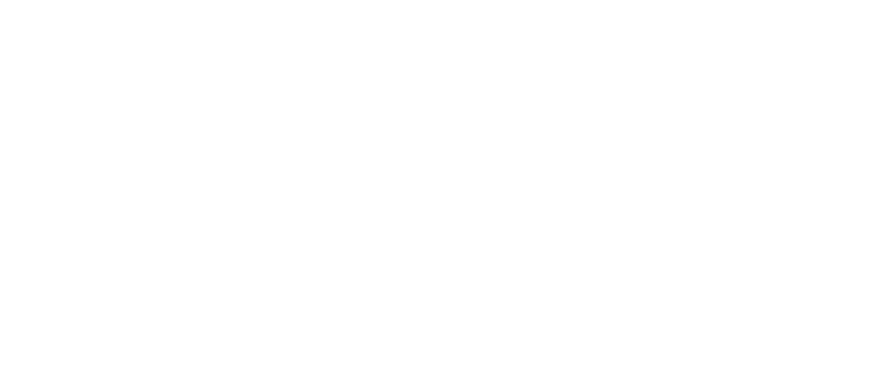

In [2]:
%matplotlib notebook
x=plt.imread('assets/starfish.png')
shape= x.shape
nu=im.kernel('motion')
H_r = im.RandomMasking(shape, 0.4)
H_b = im.Convolution(shape, nu, separable=None)
y= H_b(x)
z= H_r(x)
fig, axes = plt.subplots(ncols=3, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('Identity')
im1.show(y, ax=axes[1])
axes[1].set_title('Blur')
im1.show(z, ax=axes[2])
axes[2].set_title('Masking')
fig.show()

# I) Question 5:

For the Identity operator:

In [3]:
H_i=im.Identity((24,16))
x= np.random.rand(H_i.ishape[0], H_i.ishape[1])
y= np.random.rand(H_i.oshape[0], H_i.oshape[1])
LHS= (H_i(x)*y).sum()
RHS= (H_i.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Convolution operator:

In [4]:
nu=im.kernel('motion')
H_c=im.Convolution((24,16), nu)
x= np.random.rand(H_c.ishape[0], H_c.ishape[1])
y= np.random.rand(H_c.oshape[0], H_c.oshape[1])
LHS= (H_c(x)*y).sum()
RHS= (H_c.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Random masking operator:

In [5]:
H_r=im.RandomMasking((24,16,3), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.ishape[2])
y= np.random.rand(H_r.oshape[0], H_r.oshape[1], H_r.oshape[2])
LHS= (H_r(x)*y).sum()
RHS= (H_r.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

In [6]:
H_r=im.RandomMasking((24,16), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.shape[2])
y= np.random.rand(H_r.oshape[0], H_r.oshape[1], H_r.shape[2])
LHS= (H_r(x)*y).sum()
RHS= (H_r.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

# I) Question 6:

## For the Identity operator:

In [7]:
tau=1
H_i=im.Identity((24,16))
x= np.random.rand(H_i.ishape[0], H_i.ishape[1])
LHS= H_i.gram_resolvent(x+tau*H_i.gram(x), tau)
np.allclose(LHS, x)

True

## For the Convolution operator:

In [8]:
tau=1
nu=im.kernel('motion')
H_c=im.Convolution((24,16), nu)
x= np.random.rand(H_c.ishape[0], H_c.ishape[1])
LHS= H_c.gram_resolvent(x+tau*H_c.gram(x), tau)
np.allclose(LHS, x, atol=1e-2)

True

## For the Random Masking operator:

In [9]:
tau=1
H_r=im.RandomMasking((24,16,3), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.ishape[2])
LHS= H_r.gram_resolvent(x+tau*H_r.gram(x), tau)
np.allclose(LHS, x)

True

# II) Question 8:

<IPython.core.display.Javascript object>


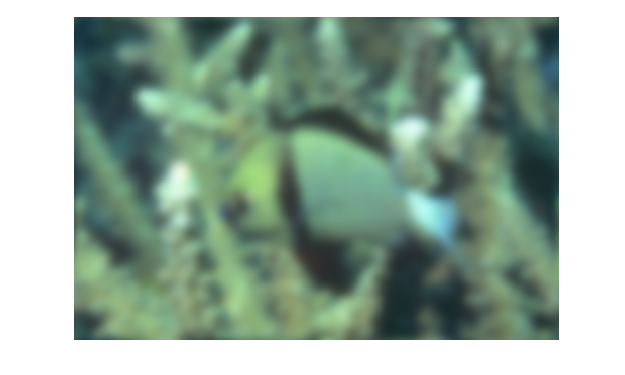

In [57]:
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1], x0.shape[2])
x=im.heat_diffusion(y, 100, 1/8)
plt.figure()
im1.show(x)

# II) Question 9:

## For the explicit case:

<IPython.core.display.Javascript object>


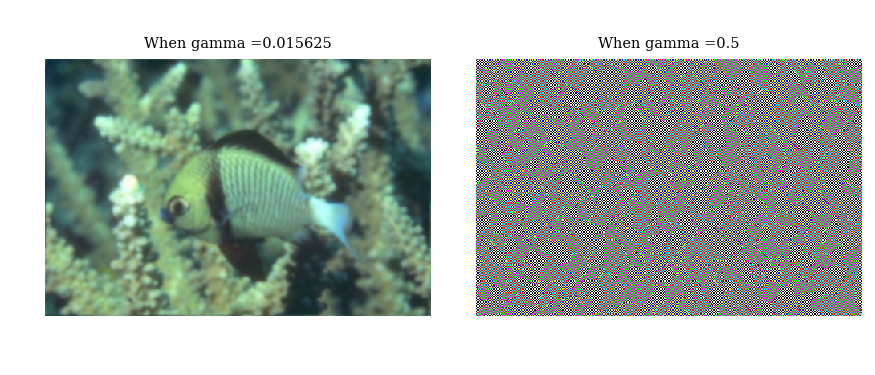

In [58]:
x=im.heat_diffusion(y, 100, 1/64, scheme='explicit')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='explicit')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

## For the implicit case:

<IPython.core.display.Javascript object>


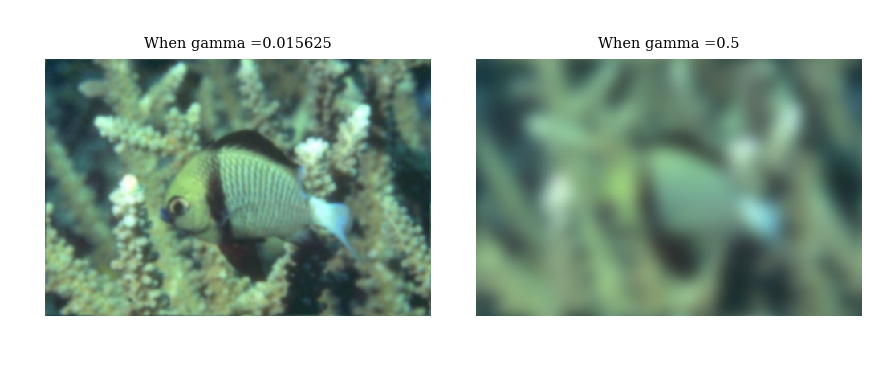

In [59]:
x=im.heat_diffusion(y, 100, 1/64, scheme='implicit')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='implicit')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

## For the continuous case:

<IPython.core.display.Javascript object>


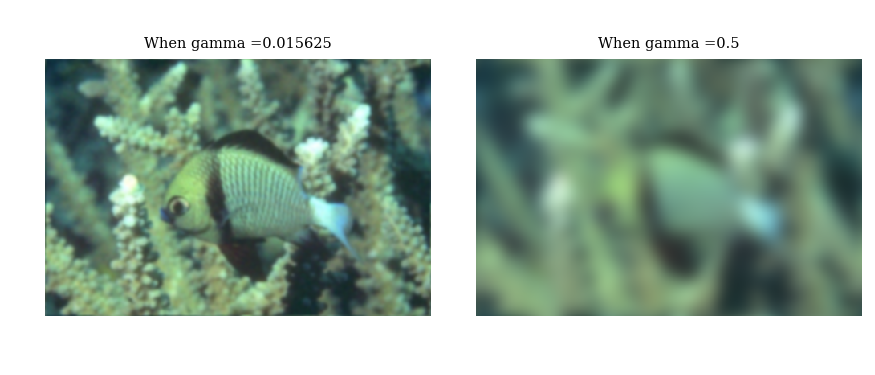

In [60]:
x=im.heat_diffusion(y, 100, 1/64, scheme='continuous')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='continuous')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

# II) Question 13:

<IPython.core.display.Javascript object>


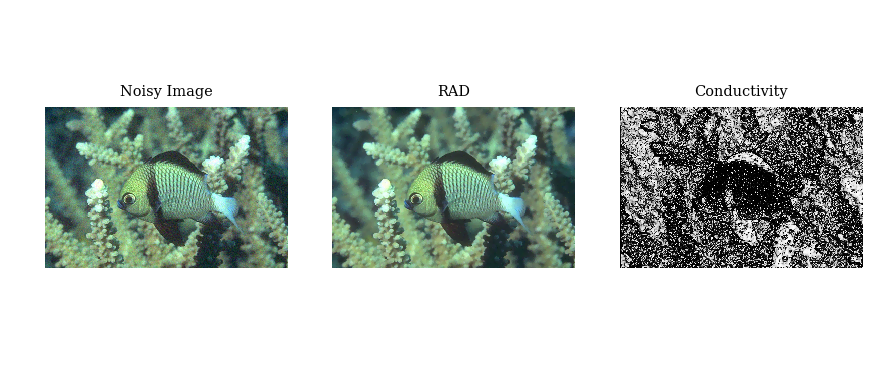

In [61]:
%matplotlib notebook
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1],x0.shape[2])
x, alpha=im.anisotropic_diffusion(y, 100, 1/8, g=None, return_conductivity=True)
fig, axes = plt.subplots(ncols=3, figsize=(7,3))
im1.show(y, ax=axes[0])
axes[0].set_title('Noisy Image')
im1.show(x, ax=axes[1])
axes[1].set_title('RAD')
im1.show(alpha, ax=axes[2])
axes[2].set_title('Conductivity')
fig.show()

# II) Question 14:

Both Heat diffusion and Anisotropic diffusion resemble the process that creates a scale space, where an image generates a parameterized family of successively more and more blurred images based on a diffusion process. Each of the resulting images in this family are given as a convolution between the image and a 2D isotropic Gaussian filter, where the width of the filter increases with the parameter. The following are the differences between the two:

$\textbf{Heat Diffusion:}$ 1. This is equivalent to Gaussian blurring. This is ideal for removing noise but also indiscriminately blurs edges too. 2. This diffusion process is a linear and space-invariant transformation of the original image. 3. Diffusion is homogeneous.

$\textbf{Anisotropic Diffusion:}$ 1. It reduces noise without removing significant parts of the image content, typically edges, lines or other details that are important for the interpretation of the image. 2.  Anisotropic diffusion is a non-linear and space-variant transformation of the original image. 3. It is inhomogeneous and nonlinear diffusion.

# II) Question 16:

<IPython.core.display.Javascript object>


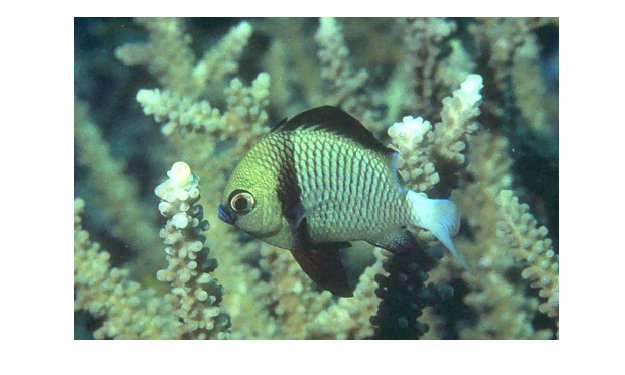

In [16]:
%matplotlib notebook
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1],x0.shape[2])
x=im.anisotropic_diffusion(y, 5, 20/8, g=None, return_conductivity=False,scheme='implicit')
im1.show(x)

<IPython.core.display.Javascript object>


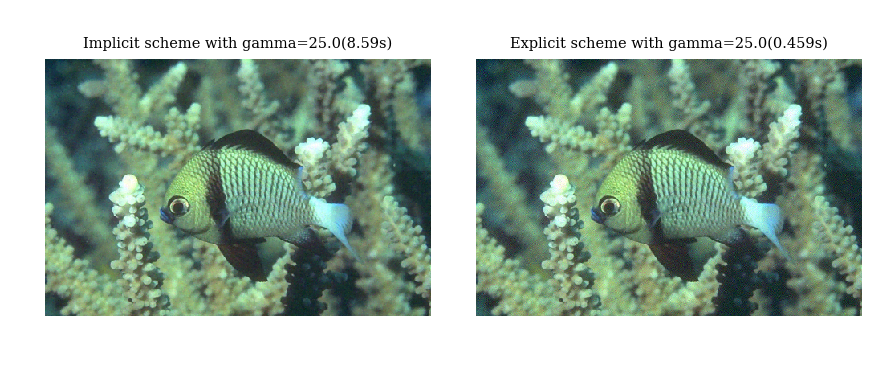

In [63]:
gamma1= 200/8; gamma2=2000/8; gamma3= 20000/8
starti1=time.time()
xi1=im.anisotropic_diffusion(y, 1, gamma1, g=None, return_conductivity=False,scheme='implicit')
endi1=time.time()
starte1=time.time()
xe1=im.anisotropic_diffusion(y, 1, gamma1, g=None, return_conductivity=False,scheme='explicit')
ende1=time.time()
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(xi1, ax=axes[0])
axes[0].set_title('Implicit scheme with gamma=' + str(gamma1) + '(' + str(round(endi1-starti1, 3)) + 's)')
im1.show(xe1, ax=axes[1])
axes[1].set_title('Explicit scheme with gamma=' + str(gamma1) + '(' + str(round(ende1-starte1, 3)) + 's)')
fig.show()

In [ ]:
starti2=time.time()
xi2=im.anisotropic_diffusion(y, 1, gamma2, g=None, return_conductivity=False,scheme='implicit')
endi2=time.time()
starte2=time.time()
xe2=im.anisotropic_diffusion(y, 1, gamma2, g=None, return_conductivity=False,scheme='explicit')
ende2=time.time()
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(xi2, ax=axes[0])
axes[0].set_title('Implicit scheme with gamma=' + str(gamma2) + '(' + str(round(endi2-starti2, 3)) + 's)')
im1.show(xe2, ax=axes[1])
axes[1].set_title('Explicit scheme with gamma=' + str(gamma2) + '(' + str(round(ende2-starte2, 3)) + 's)')
fig.show()

In [ ]:
starti3=time.time()
xi3=im.anisotropic_diffusion(y, 1, gamma3, g=None, return_conductivity=False,scheme='implicit')
endi3=time.time()
starte3=time.time()
xe3=im.anisotropic_diffusion(y, 1, gamma3, g=None, return_conductivity=False,scheme='explicit')
ende3=time.time()
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(xi3, ax=axes[0])
axes[0].set_title('Implicit scheme with gamma=' + str(gamma3) + '(' + str(round(endi3-starti3, 3)) + 's)')
im1.show(xe3, ax=axes[1])
axes[1].set_title('Explicit scheme with gamma=' + str(gamma3) + '(' + str(round(ende3-starte3, 3)) + 's)')
fig.show()

As the gamma parameter increases in the case of both the models, The resultant denoised image by the explicit scheme is noisy while the implicit scheme removes the noise and blurs the image but with some edge preservation. 

# III) Truly Anisotropic Diffusion

33.140752635424455

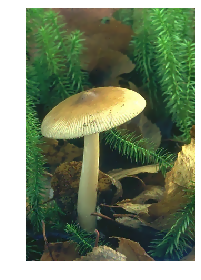

In [10]:
x0=plt.imread('assets/mushroom.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0],x0.shape[1],x0.shape[2])
x, alpha=im.anisotropic_diffusion(y, 100, 1/8, g=None, return_conductivity=True,variant='truly')
plt.figure()
im1.show(x)
im.psnr(x0,x)

33.38941742354203

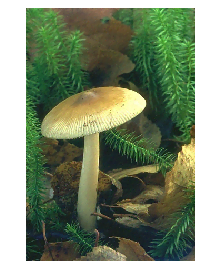

In [9]:
x0=plt.imread('assets/mushroom.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0],x0.shape[1],x0.shape[2])
x=im.anisotropic_diffusion(y, 5, 20/8, g=None, return_conductivity=False,scheme='implicit',variant ='truly')
plt.figure()
im1.show(x)
im.psnr(x0,x)

# V) Super-Resolution:

In [ ]:
%matplotlib notebook
x=plt.imread('assets/lake.png')
p1, p2 = x.shape[:2]
sigma = 60/255
m = 1
H = lambda x: (x[0::2, :] + x[1::2, :]) / 2
y = np.array([ H(x) + sigma * np.random.randn(int(p1 / 2), p2, 3) for k in range(m) ])
Ha = lambda x: x[[int(i/2) for i in range(p1)], :] / 2
ybar = np.mean(y, axis=0)
xblue = im.cg(lambda x: Ha(H(x)), Ha(ybar))
fig, axes = plt.subplots(ncols=4, figsize=(9,5))
im1.show(y, ax=axes[0])
axes[0].set_title('Subsampled image')
im1.show(xblue, ax=axes[1])
axes[1].set_title('m=1')
m=4
y = [ H(x) + sigma * np.random.randn(int(p1 / 2), p2, 3) for k in range(m) ]
Ha = lambda x: x[[int(i/2) for i in range(p1)], :] / 2
ybar = np.mean(y, axis=0)
xblue = im.cg(lambda x: Ha(H(x)), Ha(ybar))
im1.show(xblue, ax=axes[2])
axes[2].set_title('m=4')
m=20
y = [ H(x) + sigma * np.random.randn(int(p1 / 2), p2, 3) for k in range(m) ]
Ha = lambda x: x[[int(i/2) for i in range(p1)], :] / 2
ybar = np.mean(y, axis=0)
xblue = im.cg(lambda x: Ha(H(x)), Ha(ybar))
im1.show(xblue, ax=axes[3])
axes[3].set_title('m=20')
fig.show()